In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = '16'
plt.rcParams['figure.dpi'] = 125
plt.rcParams['figure.facecolor'] = 'white'

import numpy as np
import math
from math import exp,pi
import struct, os



In [12]:
file_name = '/Users/gilaverbuch/dev/SHRU_programs/SHRU_24bit/05140537.D21'
matlab_channel = np.loadtxt('/Users/gilaverbuch/dev/SHRU_programs/SHRU_24bit/channel1.scv')
# Header = read_header()

In [13]:
f_data = open(file_name, "rb")  # reopen the file
x = f_data.read()

In [14]:
xs = bytearray(b'\x00\x1b\xcf')
xs.append(0)
print(xs)
struct.unpack('>i', b'\x00\x1b\xcf\x00')[0], int.from_bytes(xs, byteorder='big', signed=True)

bytearray(b'\x00\x1b\xcf\x00')


(1822464, 1822464)

In [15]:
pos = 1024
l = (len(x[1024:])//128)
npts = 1048576

chanel1 = np.empty(0, dtype = np.float32)
chanel2 = np.empty(0, dtype = np.float32)
chanel3 = np.empty(0, dtype = np.float32)
chanel4 = np.empty(0, dtype = np.float32)
for i in range(0,l//10, 12):
    pos = pos+i
    d = bytearray(x[pos:pos+3])
    d.append(0)
    dpoint = int.from_bytes(d, byteorder='big', signed=True) * (2.5/(2**23)/20)
    chanel1 = np.append(chanel1, dpoint)
#     print(i, d)
#     try:
#         dpoint = struct.unpack('>i', d)[0] * (2.5/(2**23)/20)
        
#         chanel1 = np.append(chanel1, dpoint)
#     except:
#         pass
    


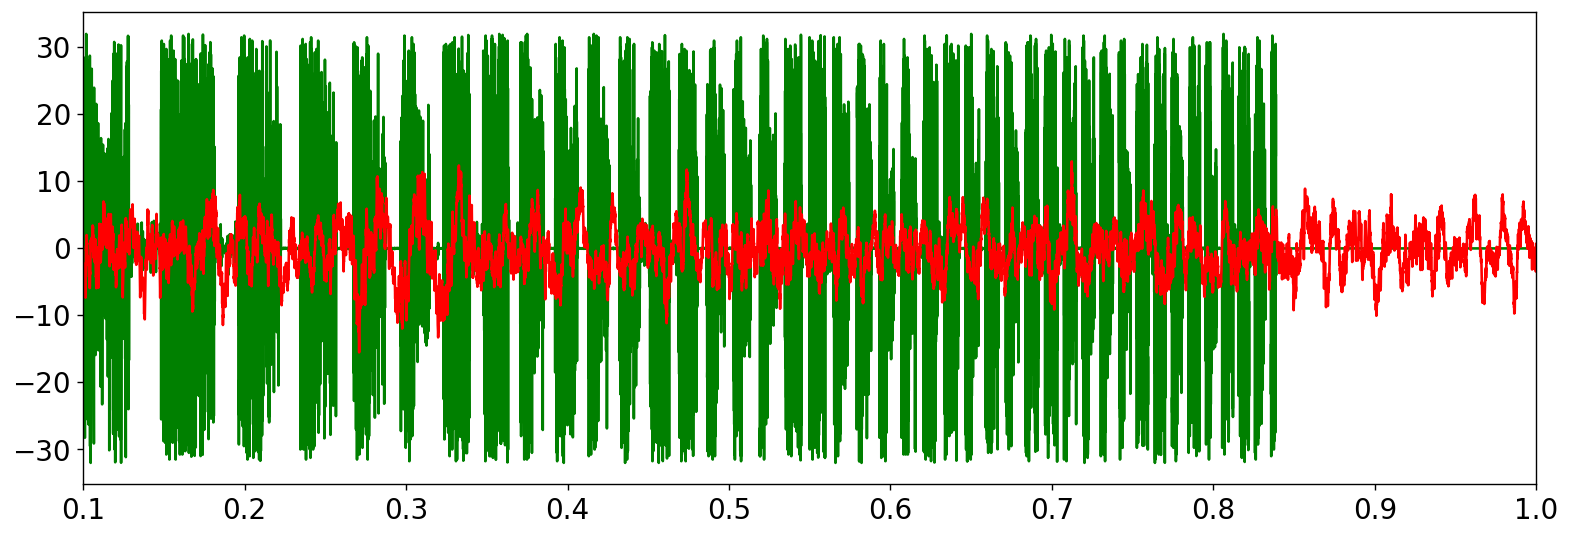

In [19]:
samp_freq = 19531.25
dt = 1/samp_freq
time_p = np.arange(0, len(chanel1)*dt, dt)
time_m = np.arange(0, len(matlab_channel)*dt, dt)

plt.figure(figsize = (15,5))
plt.plot(time_p, chanel1, 'g')
plt.plot(time_m, matlab_channel*1e-4, 'r')

plt.xlim(0.1, 1)
plt.show()

In [32]:
chanel1[100000:100010]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [50]:
import pyoad

ModuleNotFoundError: No module named 'pyoad'

In [ ]:
int.from_bytes(d, byteorder='big', signed=False) * (2.5/(2**23)/20)

In [21]:
f_data = open(file_name, "rb")  # reopen the file
# f_data.seek(D['reclen'][0], os.SEEK_SET)  # seek

x = f_data.read()
# x = np.fromfile(f_data, dtype='>u1')  # read the data into numpy

In [25]:
data = struct.unpack("i" * ((len(x) -24) // 4), x[20:-4])

In [48]:
len(data[1024:]) , len(chanel1)

3839.9950603627485